In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Load data:

data = pd.read_csv("oddsPrevGols.txt")
print(data.head())

   Unnamed: 0            HT                AT  SHT  AHT  +0.5  -0.5  +1.5  \
0           0   Chapecoense          Coritiba    2    1  1.09  1.09  1.45   
1           1     Palmeiras  Atlético Mineiro    2    2  1.08  1.08  1.42   
2           2    Fluminense         Joinville    1    0  1.08  1.08  1.38   
3           3        Grêmio       Ponte Preta    3    3  1.09  1.09  1.42   
4           4  Athletico-PR     Internacional    3    0  1.08  1.08  1.42   

   -1.5  +2.5  -2.5  +3.5  -3.5  OS  
0  2.65  2.40  1.53  4.30  1.18   3  
1  2.80  2.30  1.62  4.00  1.20   4  
2  2.90  2.20  1.65  3.75  1.22   1  
3  2.70  2.35  1.57  4.20  1.20   6  
4  2.80  2.25  1.62  4.00  1.20   3  


In [22]:
# Preprocessing:

predict = 'BodyFat'

Y = data[predict]
X = data.drop(columns=[predict])
Xlabels = X.columns

Y = Y.transform(lambda x: 1 if x <= 5 else (2 if x>5 and x<=14 else (3 if x>14 and x<16 else(4 if x>=16 and x<25 else 5))))

print(f'Target Class:\n{Y.head()}')
print(f'Feature Class:\n{X.head()}')

Y = Y.to_numpy()
X = X.to_numpy()

Target Class:
0    2
1    2
2    5
3    2
4    5
Name: BodyFat, dtype: int64
Feature Class:
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


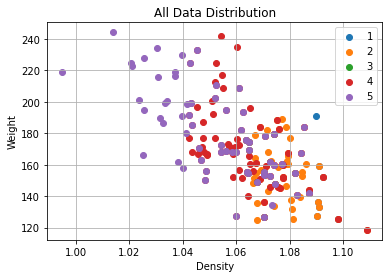

In [23]:
# Distrubuition of data: 

Xd = X.copy()
Yd = Y.copy()

TargetLabels = list(set(Y))

for i in range(len(Yd)):
    for j in range(i + 1, len(Yd)):
        if Yd[i] > Yd[j]:
            Yd[i], Yd[j] = Yd[j], Yd[i]
            Xd[i], Xd[j] = Xd[j], Xd[i]

lens = [0]
setY_ = list(set(Yd))
soma = 0
for i in range(len(setY_)):
    for j in range(len(Yd)):
        if Yd[j] == setY_[i]:
            soma += 1
    lens.append(soma)

plt.figure()
for i in range(len(setY_)):
    plt.scatter(Xd[lens[i]:lens[i+1]-1, 0], Xd[lens[i]:lens[i+1]-1, 2])
plt.legend(TargetLabels)
plt.ylabel(Xlabels[2])
plt.title("All Data Distribution")
plt.xlabel(Xlabels[0])
plt.grid()

O melhor testsize é: 0.30000000000000004



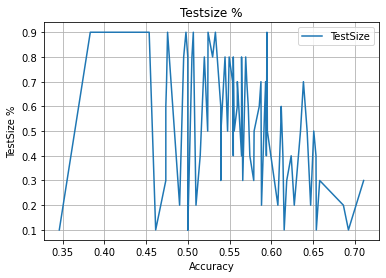

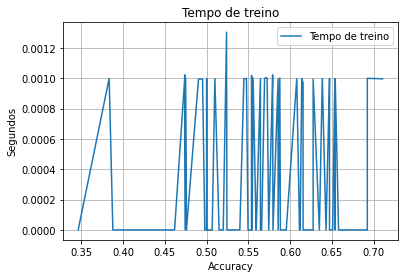

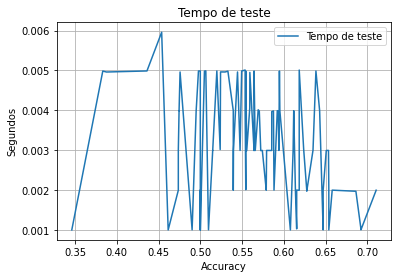

In [24]:
# Find the best split train/test for the data

accTestsize = []
modelosTestsize = []

for i in range(10):
    for t in np.arange(0.1, 1, 0.1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t)
        clf = KNeighborsClassifier()

        tempoTreino = time.time()
        clf.fit(X_train, Y_train)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = accuracy_score(Y_test, pred)

        modelosTestsize.append([clf, t, acc, tempoTreino, tempoTeste])
        accTestsize.append(acc)

for i in range(len(accTestsize)):
    for j in range(i + 1, len(accTestsize)):
        if accTestsize[i] > accTestsize[j]:
            modelosTestsize[i], modelosTestsize[j] = modelosTestsize[j], modelosTestsize[i]
            accTestsize[i], accTestsize[j] = accTestsize[j], accTestsize[i]

bestTestsize = modelosTestsize[-1]
testsize = bestTestsize[1]

print(f'O melhor testsize é: {testsize}\n')

modelosTestsize = np.array(modelosTestsize)

plt.figure()
plt.title('Testsize %')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 1], label="TestSize")
plt.ylabel("TestSize %")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 3], label="Tempo de treino")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 4], label="Tempo de teste")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

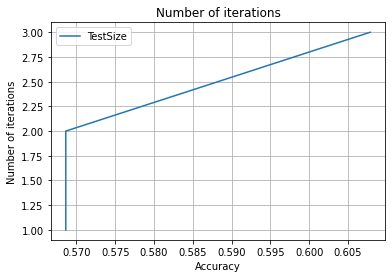

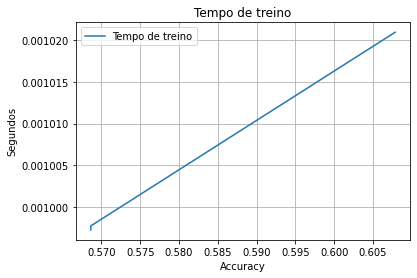

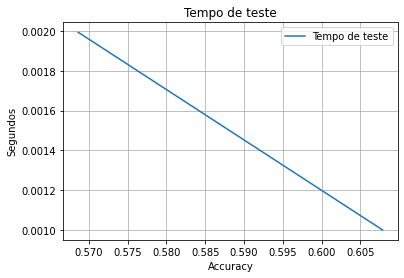

In [25]:
# Getting the best split of data for prediction with testsize = 0.2:

accTestsize = []
modelosTestsize = []

t = 0
while 1:
    t += 1

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    clf = KNeighborsClassifier()

    tempoTreino = time.time()
    clf.fit(X_train, Y_train)
    tempoTreino = time.time() - tempoTreino

    tempoTeste = time.time()
    pred = clf.predict(X_test)
    tempoTeste = time.time() - tempoTeste

    acc = accuracy_score(Y_test, pred)

    modelosTestsize.append([clf, t, acc, tempoTreino, tempoTeste])
    accTestsize.append(acc)

    if acc >= 0.60:
        break

for i in range(len(accTestsize)):
    for j in range(i + 1, len(accTestsize)):
        if accTestsize[i] > accTestsize[j]:
            modelosTestsize[i], modelosTestsize[j] = modelosTestsize[j], modelosTestsize[i]
            accTestsize[i], accTestsize[j] = accTestsize[j], accTestsize[i]

bestTestsize = modelosTestsize[-1]
testsize = bestTestsize[1]

modelosTestsize = np.array(modelosTestsize)

plt.figure()
plt.title('Number of iterations')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 1], label="TestSize")
plt.ylabel("Number of iterations")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 3], label="Tempo de treino")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 4], label="Tempo de teste")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

O melhor kn é: 10
O melhor r é: 1


Text(0.5, 0, 'Accuracy')

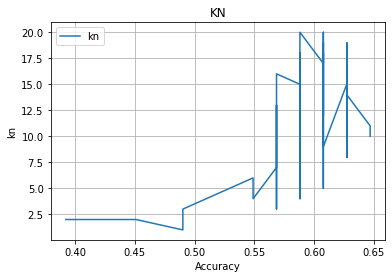

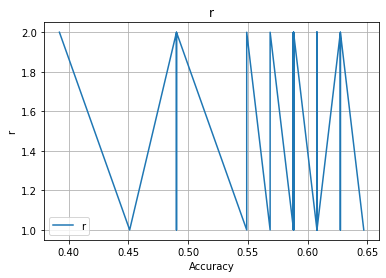

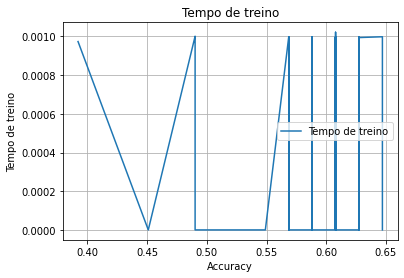

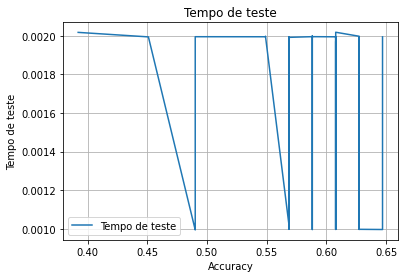

In [26]:
# Find the best paramns kn and r for the data:

accParamns = []
modelosParamns = []

for r in range(1, 3):
    for k in range(1, 21):
        clf = KNeighborsClassifier(n_neighbors=k, p=r)

        tempoTreino = time.time()
        clf.fit(X_train, Y_train)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = accuracy_score(Y_test, pred)

        modelosParamns.append([clf, k, r, acc, tempoTreino, tempoTeste])
        accParamns.append(acc)

for i in range(len(accParamns)):
    for j in range(i + 1, len(accParamns)):
        if accParamns[i] > accParamns[j]:
            modelosParamns[i], modelosParamns[j] = modelosParamns[j], modelosParamns[i]
            accParamns[i], accParamns[j] = accParamns[j], accParamns[i]

bestParamns = modelosParamns[-1]
kn = bestParamns[1]
r = bestParamns[2]

print(f'O melhor kn é: {kn}')
print(f'O melhor r é: {r}')

modelosParamns = np.array(modelosParamns)

plt.figure()
plt.title('KN')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 1], label="kn")
plt.ylabel("kn")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('r')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 2], label="r")
plt.ylabel("r")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 4], label="Tempo de treino")
plt.ylabel("Tempo de treino")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 5], label="Tempo de teste")
plt.ylabel("Tempo de teste")
plt.legend()
plt.grid()
plt.xlabel("Accuracy")

In [27]:
# Get all analysis from the best model find using sklearn:

clf = KNeighborsClassifier(n_neighbors=kn, p=r)
setY_ = list(set(Y_test))

tempoTreino = time.time()
clf.fit(X_train, Y_train)
tempoTreino = time.time() - tempoTreino

tempoTeste = time.time()
pred = clf.predict(X_test)
tempoTeste = time.time() - tempoTeste

matrizConf = confusion_matrix(Y_test, pred)

dfMatrizConf = pd.DataFrame(matrizConf, columns=setY_)
dfMatrizConf.index = setY_

print("---------------------------------")
print(f'Parâmetros: kn = {kn}, r = {r}, tempo de teste = {tempoTeste} e tempo de treino = {tempoTreino}')
print("---------------------------------")

print("---------------------------------")
print(f'Y_test =   {Y_test}\nPredição = {pred}')
print("---------------------------------")

print("---------------------------------")
print("Matriz Confusão:")
print(dfMatrizConf)
print("---------------------------------")

acc = accuracy_score(Y_test, pred)
print(f'Accuracy média = {acc}')

---------------------------------
Parâmetros: kn = 10, r = 1, tempo de teste = 0.0020189285278320312 e tempo de treino = 0.0
---------------------------------
---------------------------------
Y_test =   [2 3 5 5 5 2 5 2 4 2 2 4 4 2 5 2 4 4 3 2 4 5 4 4 4 3 5 4 1 5 4 2 5 4 2 2 4
 5 2 5 3 2 5 4 4 2 2 2 2 2 5]
Predição = [4 4 5 5 4 2 5 2 4 2 4 4 4 2 4 2 4 4 2 2 2 5 4 5 4 2 4 4 2 5 4 2 5 4 2 2 2
 5 2 4 2 4 5 2 4 4 2 4 2 2 5]
---------------------------------
---------------------------------
Matriz Confusão:
   1   2  3   4  5
1  0   1  0   0  0
2  0  13  0   5  0
3  0   3  0   1  0
4  0   3  0  11  1
5  0   0  0   4  9
---------------------------------
Accuracy média = 0.6470588235294118
